# 개별 코드

In [1]:
# 데이터 생성
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

In [2]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(100, 2)
(100,)


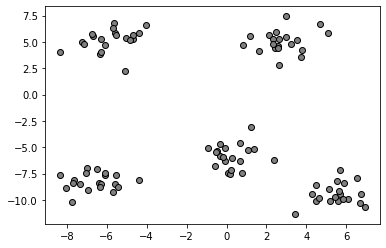

In [3]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [4]:
# k-means clustering
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=5, 
             init='random', 
             max_iter=100, 
             random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_ 
print(label_kmc)

[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]


In [5]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd

kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [6]:
# 타겟 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


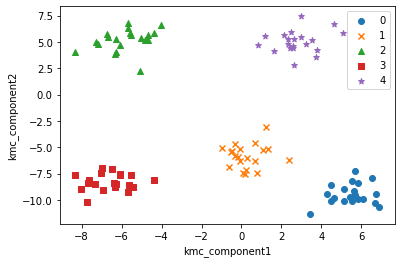

In [7]:
# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

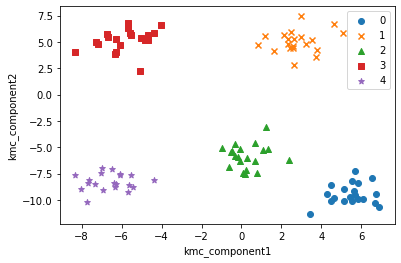

In [8]:
# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [9]:
# 모형 평가
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782


# 통합 코드

(100, 2)
(100,)


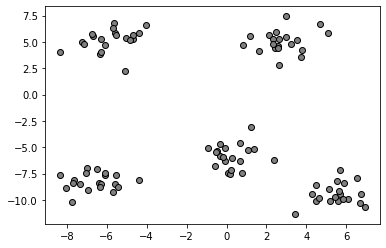

[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


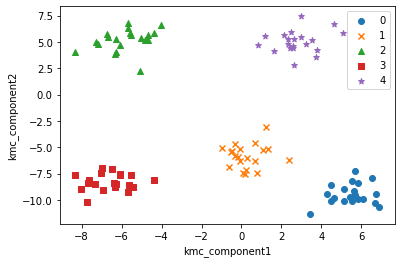

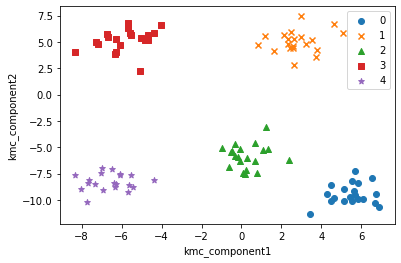

0.7598181300128782


In [10]:
from sklearn.datasets import make_blobs

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 생성
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

# 라벨링 되지 않은 데이터 플랏
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

# k-means clustering
kmc = KMeans(n_clusters=5, 
             init='random', 
             max_iter=100, 
             random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_ 
print(label_kmc)

# 시각화를 위한 데이터프레임 생성
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

# 타겟 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()


# 모형 평가
sil_score = silhouette_score(X, label_kmc)
print(sil_score)